# Modèle de langage probabiliste neuronal
Un modèle de langage probabiliste neuronal, souvent appelé MNPL (ou NPLP en anglais pour "Neural Probabilistic Language Model"), est un type de modèle qui utilise des réseaux de neurones pour modéliser la probabilité de séquences de mots dans un langage donné.

Mathématiquement, cela peut être formulé comme suit :

Soit $W = (w_1, w_2, ..., w_n)$ une séquence de mots, où $w_i$ représente le i-ème mot de la séquence. L'objectif est de trouver la probabilité conditionnelle de la séquence entière :

$$P(W) = P(w_1) \cdot P(w_2|w_1) \cdot P(w_3|w_1, w_2) \cdot \ldots \cdot P(w_n|w_1, w_2, ..., w_{n-1})$$

Un MNPL utilise un réseau de neurones pour estimer ces probabilités conditionnelles. Il prend en entrée une séquence de mots $w_1, w_2, ..., w_{i-1}$ et produit une distribution de probabilité sur le mot suivant $w_i$. Cela peut être représenté par la fonction $F$ dépendant des paramètres $\theta$ du modèle :

$$P(w_i|w_1, w_2, ..., w_{i-1}; \theta) = F(w_i, w_1, w_2, ..., w_{i-1}; \theta)$$

Le modèle est ensuite entraîné sur un corpus de texte pour ajuster les poids $\theta$ afin de minimiser la perte, généralement la perte d'entropie croisée, entre les prédictions du modèle et les mots réels observés dans les données d'entraînement.

En résumé, un MNPL utilise un réseau de neurones pour estimer la probabilité d'une séquence de mots en se basant sur les mots précédents dans la séquence. Il est entraîné sur des données textuelles pour apprendre les relations entre les mots et prédire la séquence la plus probable.

# Long Short-Term Memory (LSTM)
Voici une explication du fonctionnement d'un modèle de langage utilisant un LSTM (Long Short-Term Memory) :

1. **Couche d'Embedding** :
   - La première couche dans le modèle de langage basé sur LSTM est la couche d'embedding. Elle convertit les jetons de mots discrets en vecteurs à valeurs continues.
   - Pour chaque mot dans une séquence, il le mappe à une représentation vectorielle unique.

   Mathématiquement, l'opération d'embedding pour un jeton de mot $x_t$ peut être représentée comme suit :

   $$
   \mathbf{e}_t = \text{Embedding}(x_t)
   $$

   Ici, $\mathbf{e}_t$ est le vecteur d'embedding pour le jeton de mot $x_t$.

2. **Couche LSTM** :
   - La couche LSTM traite la séquence d'entrée embarquée et capture les dépendances à court et à long terme dans les données.
   - Elle maintient un état caché et un état de cellule qui évoluent au fil du temps.

   Les équations de la LSTM sont les suivantes :

   **Porte d'Entrée** :
   $$
   \mathbf{i}_t = \sigma(\mathbf{W}_{ii}\mathbf{e}_t + \mathbf{b}_{ii} + \mathbf{W}_{hi}\mathbf{h}_{t-1} + \mathbf{b}_{hi})
   $$

   **Porte d'Oubli** :
   $$
   \mathbf{f}_t = \sigma(\mathbf{W}_{if}\mathbf{e}_t + \mathbf{b}_{if} + \mathbf{W}_{hf}\mathbf{h}_{t-1} + \mathbf{b}_{hf})
   $$

   **Porte de Cellule** :
   $$
   \mathbf{g}_t = \tanh(\mathbf{W}_{ig}\mathbf{e}_t + \mathbf{b}_{ig} + \mathbf{W}_{hg}\mathbf{h}_{t-1} + \mathbf{b}_{hg})
   $$

   **Porte de Sortie** :
   $$
   \mathbf{o}_t = \sigma(\mathbf{W}_{io}\mathbf{e}_t + \mathbf{b}_{io} + \mathbf{W}_{ho}\mathbf{h}_{t-1} + \mathbf{b}_{ho})
   $$

   **Mise à jour de l'État de Cellule** :
   $$
   \mathbf{c}_t = \mathbf{f}_t \odot \mathbf{c}_{t-1} + \mathbf{i}_t \odot \mathbf{g}_t
   $$

   **Mise à jour de l'État Caché** :
   $$
   \mathbf{h}_t = \mathbf{o}_t \odot \tanh(\mathbf{c}_t)
   $$

   Ici, $\sigma$ est la fonction d'activation sigmoïde, $\tanh$ est la fonction tangente hyperbolique, $\odot$ représente la multiplication élément-wise, et $\mathbf{W}$ et $\mathbf{b}$ sont les matrices de poids et les vecteurs de biais associés aux portes.

3. **Couche de Sortie** :
   - La sortie de la couche LSTM passe à travers une couche linéaire (entièrement connectée) pour prédire le prochain mot dans la séquence.

   Mathématiquement, la sortie $\mathbf{y}_t$ à l'étape de temps $t$ est calculée comme suit :

   $$
   \mathbf{y}_t = \text{Linéaire}(\mathbf{h}_t)
   $$

   Ici, $\mathbf{y}_t$ est la distribution prédite sur le vocabulaire pour le prochain mot.

4. **Calcul de la Perte et Rétropropagation** :
   - La sortie $\mathbf{y}_t$ est comparée au mot cible réel en utilisant une fonction de perte (par exemple, la perte de cross-entropie).
   - Les gradients sont ensuite calculés par rapport aux paramètres (poids et biais) du modèle en utilisant la rétropropagation.
   - L'optimiseur (par exemple, la descente de gradient stochastique) est utilisé pour mettre à jour les paramètres du modèle dans la direction qui minimise la perte.

Ce processus est répété pour chaque étape de temps dans la séquence d'entrée, à la fois lors de l'entraînement et de l'inférence, pour générer des séquences de mots cohérentes et contextuellement appropriées.

In [1]:
#!gdown --id 1ry2NnU10U2JIxWzjGWhfxbdB0vtM2e1-
#!unzip corpus.zip

In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:


def load(filepath, window_size, vocab_size=None):

    words = []
    with open(filepath, 'r', encoding='utf8') as file:
        for line in file:
            words += word_tokenize(line.strip())


    x_train, y_train = [], []
    for i in range(len(words) - window_size + 1):
        x_train.append(words[i: i + window_size - 1])
        y_train.append(words[i +  window_size - 1])

    vocab = [word[0] for word in Counter(words).most_common(vocab_size)]
    word2id = { vocab[i]: i for i in range(len(vocab)) }

    return np.array(x_train), np.array(y_train)[:,None], np.array(vocab), word2id

def convert_to_id(x_train, y_train, vocab):

    word_to_id = {}
    for i, vocab in enumerate(vocab):
        word_to_id[vocab] = i

    for i in range(len(x_train)):
        x_train[i] = [word_to_id[word] for word in x_train[i]]
        y_train[i] = word_to_id[y_train[i][0]]

    return x_train.astype(int), y_train.astype(int)



In [4]:
filepath = 'corpus/text8-less.txt'

In [5]:
# hyperparamètre
batch_size = 1024
window_size = 5
vocab_size = None
hidden_size = 10
emb_dim = 50
learning_rate = 0.8
epoch_size = 1

In [6]:
x_raw, y_raw, vocab, word2id = load(filepath, window_size, vocab_size)
vocab_size = len(vocab)
print('Taille du vocabulaire: {}'.format(vocab_size))

Taille du vocabulaire: 101100


In [7]:
x_train, y_train = convert_to_id(x_raw, y_raw, vocab)
print('Longueur: {}'.format(len(x_train)))
print('Nombre de lots: {}'.format(len(x_train) / batch_size))

Longueur: 3304388
Nombre de lots: 3226.94140625


## DataLoader
Un DataLoader en PyTorch est un composant qui facilite le chargement et la gestion de données pour l'entraînement de modèles d'apprentissage automatique. Il prend un Dataset (ensemble de données) en entrée et permet de diviser les données en lots (batches), de les mélanger et de les fournir au modèle pour l'entraînement.



In [8]:
from torch.utils.data import TensorDataset, DataLoader

x_train= torch.Tensor(x_train)
y_train  = torch.Tensor(y_train)

my_dataset = TensorDataset(x_train,y_train)
train_loader = DataLoader(my_dataset,batch_size=batch_size)

# Création du réseau de neurones (LSTM) dans Pytorch

Bien sûr, je vais vous expliquer chaque bloc de code.

1. **Importation des bibliothèques**:

```python
import torch
import torch.nn as nn
```

   - Ici, nous importons les bibliothèques nécessaires pour travailler avec PyTorch. `torch` est la bibliothèque principale pour le calcul tensoriel, et `nn` contient des modules et des classes pour construire des réseaux de neurones.

2. **Définition du Modèle de Langage LSTM**:

```python
class ModeleLangageLSTM(nn.Module):
    def __init__(self, taille_vocabulaire, dimension_embedding, dimension_cachee, num_couches):
        super(ModeleLangageLSTM, self).__init__()
        self.embedding = nn.Embedding(taille_vocabulaire, dimension_embedding)
        self.lstm = nn.LSTM(dimension_embedding, dimension_cachee, num_couches, batch_first=True)
        self.lineaire = nn.Linear(dimension_cachee, taille_vocabulaire)
```

   - Nous définissons une classe `ModeleLangageLSTM` qui hérite de `nn.Module`. Cette classe représente notre modèle de langage LSTM.
   - Dans le constructeur `__init__`, nous définissons les couches du modèle :
      - `nn.Embedding`: La couche d'embedding qui mappe les mots à des vecteurs d'embedding.
      - `nn.LSTM`: La couche LSTM qui capture les dépendances à court et long terme.
      - `nn.Linear`: La couche linéaire qui produit les prédictions finales.

3. **Définition de la Fonction Forward**:

```python
def forward(self, x, cache):
    embed = self.embedding(x)
    sortie, cache = self.lstm(embed, cache)
    sortie = self.lineaire(sortie)
    return sortie, cache
```

   - La fonction `forward` définit comment les données passent à travers le réseau.
   - `x` est l'entrée (une séquence de mots).
   - `cache` représente l'état caché initial de la couche LSTM.
   - L'entrée est d'abord passée à la couche d'embedding, puis à la couche LSTM, et enfin à la couche linéaire.

4. **Initialisation de l'État Caché**:

```python
def initialiser_cache(self, taille_lot):
    poids = next(self.parameters()).data
    return (poids.new(self.num_couches, taille_lot, self.dimension_cachee).zero_(),
            poids.new(self.num_couches, taille_lot, self.dimension_cachee).zero_())
```

   - Cette méthode initialise l'état caché de la couche LSTM avec des valeurs initiales.
   - `taille_lot` est la taille du lot (nombre de séquences dans un lot d'entraînement).

5. **Exemple d'Utilisation**:

```python
taille_vocabulaire = 10000
dimension_embedding = 128
dimension_cachee = 256
num_couches = 2

modele = ModeleLangageLSTM(taille_vocabulaire, dimension_embedding, dimension_cachee, num_couches)

exemple_entree = torch.randint(0, taille_vocabulaire, (32, 20))
taille_lot = exemple_entree.size(0)
cache = modele.initialiser_cache(taille_lot)
sortie, _ = modele(exemple_entree, cache)
```

   - Dans cet exemple, nous créons une instance du modèle en utilisant les hyperparamètres spécifiés.
   - Nous générons également une entrée d'exemple sous forme de tenseur.
   - Ensuite, nous initialisons l'état caché et exécutons une passe avant à travers le modèle.

Chaque bloc de code a une fonction spécifique dans la construction et l'utilisation du modèle LSTM.

In [9]:
class ModeleLangageProbabiliste(nn.Module):
    def __init__(self, taille_vocabulaire, dimension_embedding, dimension_cachee, num_couches):
        super(ModeleLangageProbabiliste, self).__init__()
        self.num_couches=num_couches
        self.dimension_cachee=dimension_cachee
        self.embedding = nn.Embedding(taille_vocabulaire, dimension_embedding)
        self.lstm = nn.LSTM(dimension_embedding, dimension_cachee, num_couches, batch_first=True)
        self.lineaire = nn.Linear(dimension_cachee, taille_vocabulaire)

    def forward(self, x, cache):
        embed = self.embedding(x)
        sortie, cache = self.lstm(embed, cache)
        sortie = self.lineaire(sortie[:,-1,:])

        return sortie

    def initialiser_cache(self, taille_lot):
        poids = next(self.parameters()).data
        return (poids.new(self.num_couches, taille_lot, self.dimension_cachee).zero_().cuda(),
                poids.new(self.num_couches, taille_lot, self.dimension_cachee).zero_().cuda())


In [10]:
model = ModeleLangageProbabiliste(vocab_size, emb_dim , hidden_size,1).cuda()


In [11]:

num_epochs=10
# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Boucle d'entraînement
for epoch in range(num_epochs):
    total_loss = 0
    for input_seq, target_word in tqdm(train_loader):  # Itérer sur des lots
        optimizer.zero_grad()
        hidden = model.initialiser_cache(len(input_seq))
        input_seq, target_word=input_seq.cuda().long(), target_word.long().cuda()
        output = model(input_seq,hidden )

        # Aplatir la sortie et cibler la perte de calcul
        output = output.view(-1, vocab_size)
        target_word = target_word.view(-1)

        loss = criterion(output, target_word)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculer et imprimer la perte moyenne pour l'époque
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')

print('Formation terminée!')


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [1/10], Loss: 9.0063


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [2/10], Loss: 9.0682


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [3/10], Loss: 9.0723


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [4/10], Loss: 9.0691


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [5/10], Loss: 9.0648


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [6/10], Loss: 9.0688


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [7/10], Loss: 9.0786


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [8/10], Loss: 9.0327


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [9/10], Loss: 9.0392


  0%|          | 0/3227 [00:00<?, ?it/s]

Epoch [10/10], Loss: 9.0932
Formation terminée!


In [12]:
len(input_seq.shape)

2

In [13]:
input_seq.shape

torch.Size([964, 4])

In [14]:
target_word.shape

torch.Size([964])

In [15]:
word_embedding=model.embedding.weight.detach().cpu().numpy()
print(word_embedding.shape)

(101100, 50)


Pour visualiser des embeddings de mots en utilisant l'analyse en composantes principales (PCA)

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
wordemb_2D = pca.fit_transform(word_embedding)

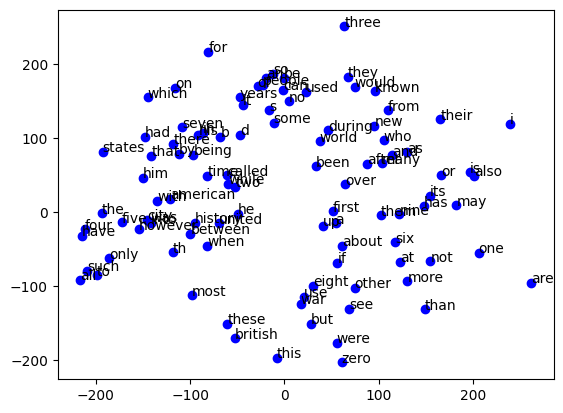

In [17]:
n = 100
x_coords = wordemb_2D[:n, 0]
y_coords = wordemb_2D[:n, 1]

plt.scatter(x_coords, y_coords, c='b')
for label, x, y in zip(vocab[:n], x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

Pour trouver les mots les plus similaires à une requête en utilisant des embeddings de mots et la similarité cosinus, suivez ces étapes :

1. **Obtention des Embeddings de Mots** :
   - Commencez par obtenir les embeddings de mots. Vous pouvez les obtenir à partir de modèles pré-entraînés comme Word2Vec, GloVe, ou en les entraînant vous-même sur vos propres données.

2. **Calcul de la Similarité Cosinus** :
   - La similarité cosinus mesure la similarité directionnelle entre deux vecteurs. Elle est calculée comme le cosinus de l'angle entre les deux vecteurs. Plus les vecteurs sont similaires, plus le cosinus sera proche de 1.

3. **Normalisation des Vecteurs** :
   - Il est important de normaliser les embeddings de mots avant de calculer la similarité cosinus. Cela garantit que la similarité mesure la similarité directionnelle plutôt que la magnitude des vecteurs.

4. **Calcul de la Similarité Cosinus** :
   - Pour chaque mot dans votre vocabulaire, calculez la similarité cosinus avec la requête en utilisant la formule :

   $$
   \text{Similarité Cosinus} = \frac{{\mathbf{A} \cdot \mathbf{B}}}{{\|\mathbf{A}\| \|\mathbf{B}\|}}
   $$

   Où $\mathbf{A}$ est l'embedding du mot dans le vocabulaire, $\mathbf{B}$ est l'embedding de la requête et $\|\cdot\|$ représente la norme euclidienne (magnitude) du vecteur.

5. **Trier par Similarité** :
   - Triez les mots en fonction de leur similarité cosinus avec la requête, en ordre décroissant. Les mots les plus similaires auront les scores de similarité les plus élevés.

6. **Sélection des Mots Similaires** :
   - Sélectionnez les mots avec les scores de similarité les plus élevés comme étant les mots les plus similaires à la requête.


In [18]:
from pprint import pprint

def cosine_similarity(wordvec1, wordvec2):
    return np.dot(wordvec1, wordvec2) / (np.linalg.norm(wordvec1) * np.linalg.norm(wordvec2))

def distance(wordvec1, wordvec2):
    return (np.linalg.norm(wordvec1 - wordvec2))

def most_similar(word_embedding, word):

    target = word2id[word]
    n = 10
    top10 = [('', 100000) for i in range(n)]


    for i in range(len(word_embedding)):
        if i == target:
            continue

        sim = distance(word_embedding[target], word_embedding[i])
        for j in range(n):
            if sim <= top10[j][1]:
                top10[j+1:] = top10[j:-1]
                top10[j] = (vocab[i], sim)
                break
    pprint(top10)

most_similar(word_embedding, 'politics')

[('shape', 96.29646),
 ('retrospective', 102.05647),
 ('resting', 111.24298),
 ('bicycling', 119.76286),
 ('allen', 121.34804),
 ('catholicism', 122.00536),
 ('literal', 126.373436),
 ('discouraging', 127.94318),
 ('formam', 128.27649),
 ('prototyped', 128.50217)]
